In [1]:
from fuzzyART_gai import *
from kit_handy import *
from kit_painting import *
import matplotlib.pyplot as plt

In [2]:
alldata, label_true = load_data('gaussian2d') #  'iris') #
feat_num = alldata.shape[1]
pca_painter = PaintPCA(alldata)
replay_painter = VisualiseReplay(alldata)
replay_num = 100
#plt.scatter(*alldata.T)

No PCA performed


Category 5 is too small
Category 6 is too small


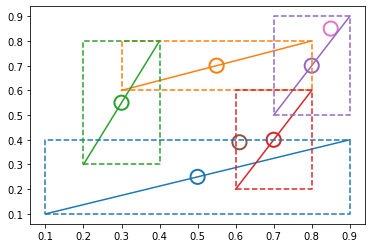

In [3]:
fig, ax = plt.subplots(1, 1)
# use FuzzyART
# init
rho = .5
net = FuzzyART(feat_num, rho=rho) 
net.w = np.array([[.1, .1, .1, .6],
                 [.3, .6, .2, .2],
                 [.2, .3, .6, .2],
                 [.6, .2, .2, .4],
                 [.7, .5, .1, .1],
                 [.61,.39,.39,.61],
                 [.85,.85,.15,.15]])
pca_painter.tripole(ax, *net.getcat_bipole())
ax.set_prop_cycle(None)
pca_painter.boundary(ax, net.getcat_vertex())

Category 5 is too small
Category 6 is too small
Category 5 is too small
Category 6 is too small
Directory  _simcache/unlearn_frames_2022-05-12_15-54-20  Created 
figure saved at _simcache/unlearn_frames_2022-05-12_15-54-20/2022-05-12_15-54-20_var_rho50[1652367260326898]
Category 5 is too small
Category 6 is too small
figure saved at _simcache/unlearn_frames_2022-05-12_15-54-20/2022-05-12_15-54-20_var_rho50[1652367260577281]
Category 5 is too small
Category 6 is too small
figure saved at _simcache/unlearn_frames_2022-05-12_15-54-20/2022-05-12_15-54-20_var_rho50[1652367260799532]
Category 5 is too small
Category 6 is too small
figure saved at _simcache/unlearn_frames_2022-05-12_15-54-20/2022-05-12_15-54-21_var_rho50[1652367261028677]
Category 5 is too small
Category 6 is too small
figure saved at _simcache/unlearn_frames_2022-05-12_15-54-20/2022-05-12_15-54-21_var_rho50[1652367261264692]
Category 5 is too small
Category 6 is too small
figure saved at _simcache/unlearn_frames_2022-05-12_1

Category 5 is too small
Category 6 is too small
figure saved at _simcache/unlearn_frames_2022-05-12_15-54-20/2022-05-12_15-54-31_var_rho50[1652367271762649]
Category 5 is too small
Category 6 is too small
figure saved at _simcache/unlearn_frames_2022-05-12_15-54-20/2022-05-12_15-54-32_var_rho50[1652367272028503]
Category 5 is too small
Category 6 is too small
figure saved at _simcache/unlearn_frames_2022-05-12_15-54-20/2022-05-12_15-54-32_var_rho50[1652367272340802]
Category 5 is too small
Category 6 is too small
figure saved at _simcache/unlearn_frames_2022-05-12_15-54-20/2022-05-12_15-54-32_var_rho50[1652367272622620]
Category 5 is too small
Category 6 is too small
figure saved at _simcache/unlearn_frames_2022-05-12_15-54-20/2022-05-12_15-54-32_var_rho50[1652367272810075]
Category 5 is too small
Category 6 is too small
figure saved at _simcache/unlearn_frames_2022-05-12_15-54-20/2022-05-12_15-54-33_var_rho50[1652367273020500]
Category 5 is too small
Category 6 is too small
figure sav

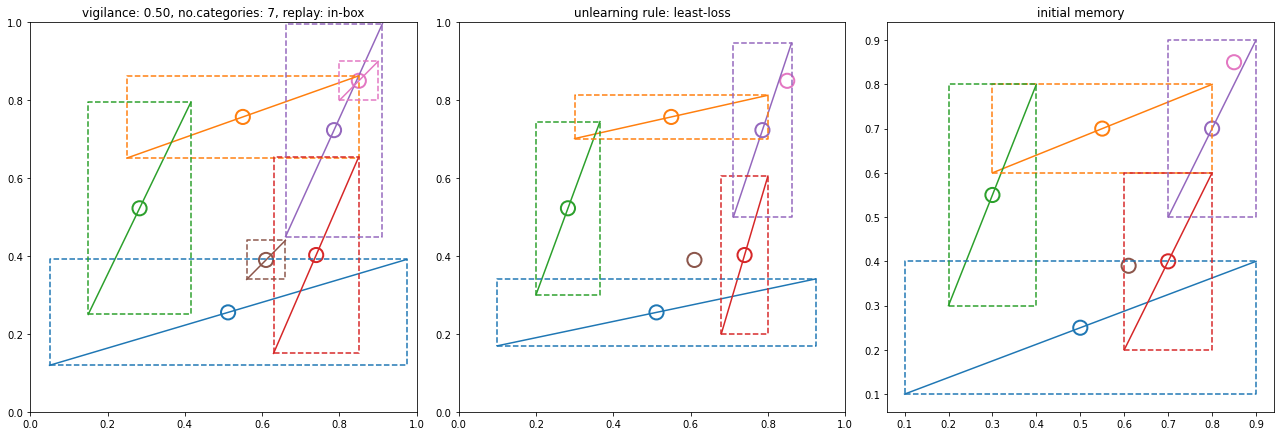

In [4]:
now = timestamp()[0]
np.random.shuffle(alldata)

no_epoch = 100
fig, ax = plt.subplot_mosaic('''
                                ABC
                                ''',
                                figsize = (18, 6))
fig.tight_layout()
    
# draw cats
pca_painter.tripole(ax['C'], *net.getcat_bipole())
ax['C'].set_prop_cycle(None)
pca_painter.boundary(ax['C'], net.getcat_vertex())
ax['C'].set_title('initial memory')
    
replay_scheme = 'in-box'
unlearn_rule = 'least-loss'
std=-.05
for epoch in range(no_epoch):
    # clear axes
    for key in 'AB':
        ax[key].cla()
        
        

    
    # draw cats
    pca_painter.tripole(ax['A'], *net.getcat_bipole(s=std))
    ax['A'].set_prop_cycle(None)
    pca_painter.boundary(ax['A'], net.getcat_vertex(s=std))
        
    # replay
    replay_sample, cat_unlearn = net.replay_self_consistency(1, s=std, scheme=replay_scheme)    
    
    # unlearn
    for catidx, sample in zip(cat_unlearn, replay_sample):
        if catidx == -1:
            mt = 'o'
        else:
            mt = 'X'
            net._contraction(catidx, net._complement_code(sample), beta=1, whichidx=unlearn_rule)
                        
        new_sample = [ax[key].scatter(*replay_sample.T, marker=mt, s=666, facecolor='none', edgecolor='k') for key in 'AB']

    
    # draw new cats
    pca_painter.tripole(ax['B'], *net.getcat_bipole())
    ax['B'].set_prop_cycle(None)
    pca_painter.boundary(ax['B'], net.getcat_vertex())
        
    # info
    cat_number = net.w.shape[0]
    ax['A'].set_title('vigilance: {:.2f}, no.categories: {}, replay: {}'.format(rho, cat_number, replay_scheme))
    ax['B'].set_title('unlearning rule: {}'.format(unlearn_rule))
    
    for key in 'AB':
        ax[key].set_xlim(0, 1)
        ax[key].set_ylim(0, 1)
    
    # save fig
    simname = 'var_rho{:d}'.format(int(rho*100))
    dirname = '_simcache/unlearn_frames_{}'.format(now)
    savefigure_datetime(fig, simname, dirname)
    
    [ns.remove() for ns in new_sample]



In [5]:
net.w

array([[0.1       , 0.1693911 , 0.07626203, 0.65876038],
       [0.3       , 0.70160845, 0.2       , 0.18715764],
       [0.2       , 0.3       , 0.63429195, 0.25476043],
       [0.67943215, 0.2       , 0.2       , 0.39485717],
       [0.71064893, 0.5       , 0.13890099, 0.05333604],
       [0.61      , 0.39      , 0.39      , 0.61      ],
       [0.85      , 0.85      , 0.15      , 0.15      ]])